In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("books.csv",  error_bad_lines = False)

<ipython-input-3-29dc09e052be>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("books.csv",  error_bad_lines = False)
Skipping line 4012: expected 10 fields, saw 11
Skipping line 5688: expected 10 fields, saw 11
Skipping line 7056: expected 10 fields, saw 11
Skipping line 10601: expected 10 fields, saw 11
Skipping line 10668: expected 10 fields, saw 11



In [ ]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
...,...,...,...,...,...,...,...,...,...,...
13709,47699,M Is for Magic,Neil Gaiman-Teddy Kristiansen,3.82,0061186422,9780061186424,eng,260,11317,1060
13710,47700,Black Orchid,Neil Gaiman-Dave McKean,3.72,0930289552,9780930289553,eng,160,8710,361
13711,47701,InterWorld (InterWorld #1),Neil Gaiman-Michael Reaves,3.53,0061238961,9780061238963,en-US,239,14334,1485
13712,47708,The Faeries' Oracle,Brian Froud-Jessica Macbeth,4.43,0743201116,9780743201117,eng,224,1550,38


In [ ]:

def check_completion(data):

    var_dict = {}

    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())

    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de complétion", "Nombre de valeurs manquantes"]).sort_values(by="Taux de complétion",ascending=False )

In [ ]:
check_completion(df)

,Taux de complétion,Nombre de valeurs manquantes
bookID,100.0,0
title,100.0,0
authors,100.0,0
average_rating,100.0,0
isbn,100.0,0
isbn13,100.0,0
language_code,100.0,0
# num_pages,100.0,0
ratings_count,100.0,0
text_reviews_count,100.0,0


In [ ]:
columns_to_drop = ['isbn', 'isbn13', 'bookID']
df.drop(columns=columns_to_drop, inplace=True)

<ipython-input-29-3033c0efef66>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), bins=30)


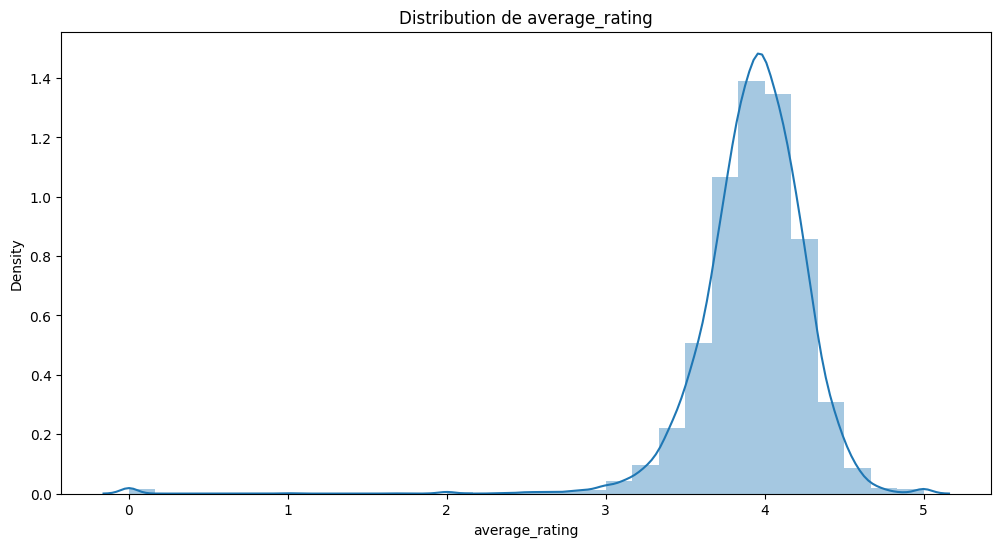

In [ ]:
for column in df.select_dtypes(['int32', 'float64']).columns:
    plt.figure(figsize=(12,6))
    plt.title('Distribution de ' + column)
    sns.distplot(df[column].dropna(), bins=30)

<ipython-input-15-c5a90781c972>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


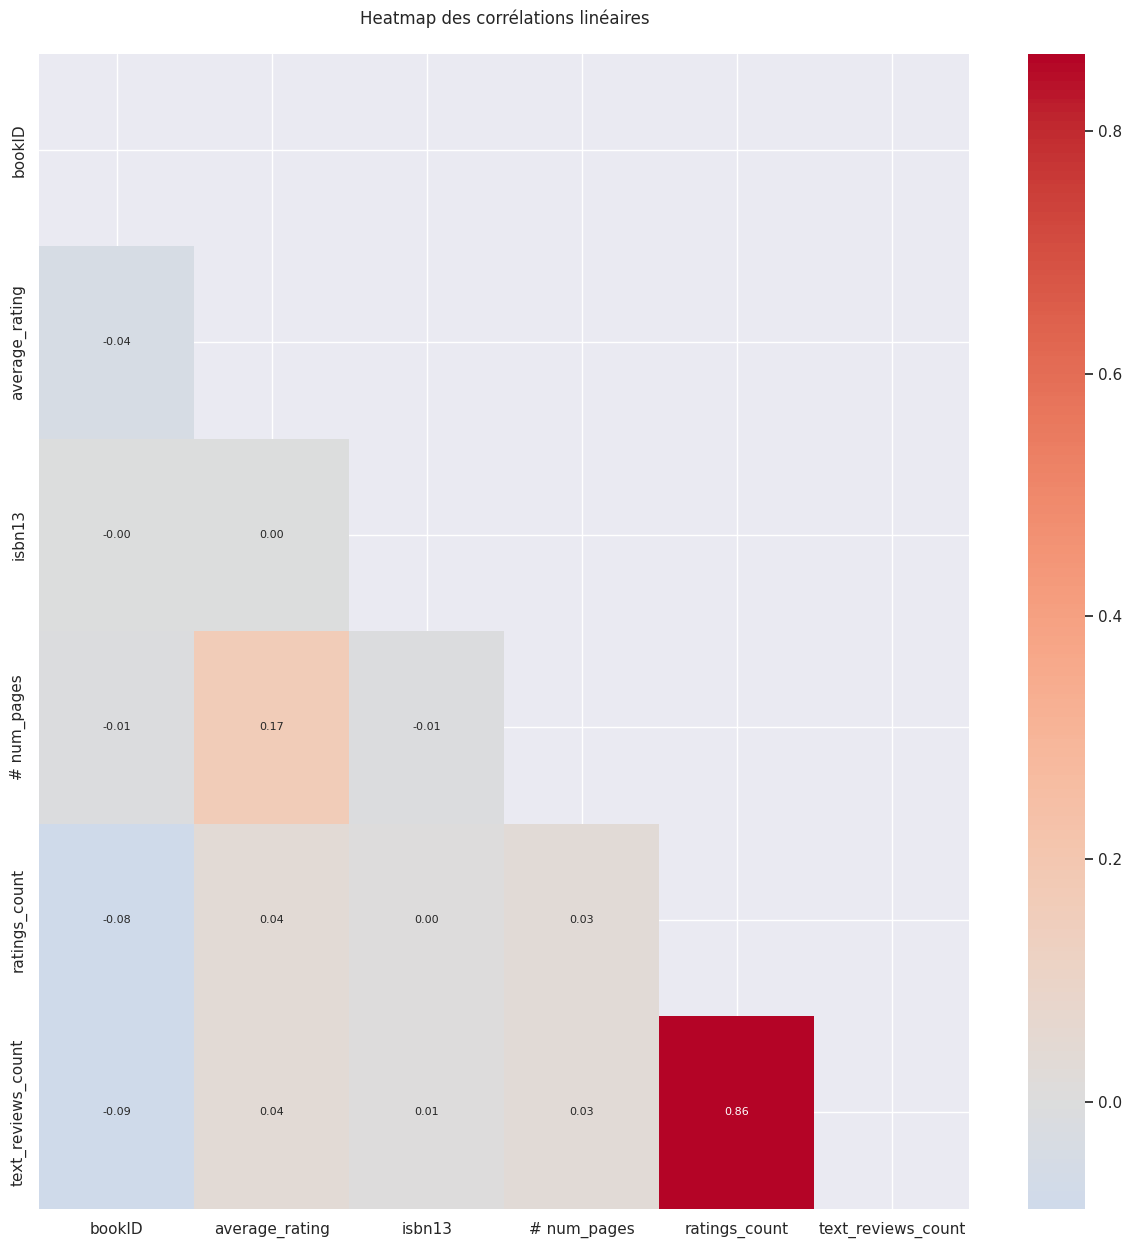

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8},
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   bookID              13714 non-null  int64   
 1   title               13714 non-null  object  
 2   authors             13714 non-null  object  
 3   average_rating      13714 non-null  float64 
 4   isbn                13714 non-null  object  
 5   isbn13              13714 non-null  int64   
 6   language_code       13714 non-null  object  
 7   # num_pages         13714 non-null  int64   
 8   ratings_count       13714 non-null  int64   
 9   text_reviews_count  13714 non-null  int64   
 10  class               13714 non-null  category
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 1.1+ MB


Création d'une nouvelle colonne 'class' dans le DataFrame en catégorisant les notes moyennes avec des étiquettes 'BAD', 'Medium' et 'Good' selon des intervalles prédéfinis

In [ ]:
import pandas as pd

bins = [-float('inf'), 2, 4, 5]
labels = ['BAD', 'Medium', 'Good']

df['class'] = pd.cut(df['average_rating'], bins=bins, labels=labels, include_lowest=True)


#  Classification without "title" Column

In [ ]:
Y = df[['class']]
df= df.drop(['class'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoding to the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# determine categorical and numerical features
numerical_i = df.select_dtypes(include=['int64', 'float64']).columns
categorical_i = df.select_dtypes(include=['object', 'bool']).columns

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
df[numerical_i] = ss.fit_transform(df[numerical_i])
ohe.fit_transform(df[categorical_i])

data_scaled= pd.merge(df[numerical_i],
          pd.DataFrame(columns = ohe.get_feature_names_out().tolist(),
              data = ohe.fit_transform(df[categorical_i])),
        left_index = True, right_index = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y_encoded, test_size=0.2, random_state=42)
print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 10971 lignes,
Test: 2743 lignes.



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score

# Create an XGBoost Classifier with specific hyperparameters
xgb_classifier = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100
)

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
jaccard = jaccard_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)


Weighted F1 Score: 0.6178109279338772
Weighted Jaccard Coefficient: 0.46545168268286363
Accuracy: 0.6540284360189573
Weighted Recall: 0.6540284360189573
Weighted Precision: 0.6631355456566499


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score


# Create an SVM Classifier with RBF kernel
svm_classifier = SVC(kernel='rbf')

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)


# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
jaccard = jaccard_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)

Weighted F1 Score: 0.642656679712721
Weighted Jaccard Coefficient: 0.4892203770999042
Accuracy: 0.6726212176449143
Weighted Recall: 0.6726212176449143
Weighted Precision: 0.6807709107362261


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_classifier.predict(X_test)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
jaccard = jaccard_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)

Weighted F1 Score: 0.6708738657192107
Weighted Jaccard Coefficient: 0.5166355086122654
Accuracy: 0.6919431279620853
Weighted Recall: 0.6919431279620853
Weighted Precision: 0.6962960562384212


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


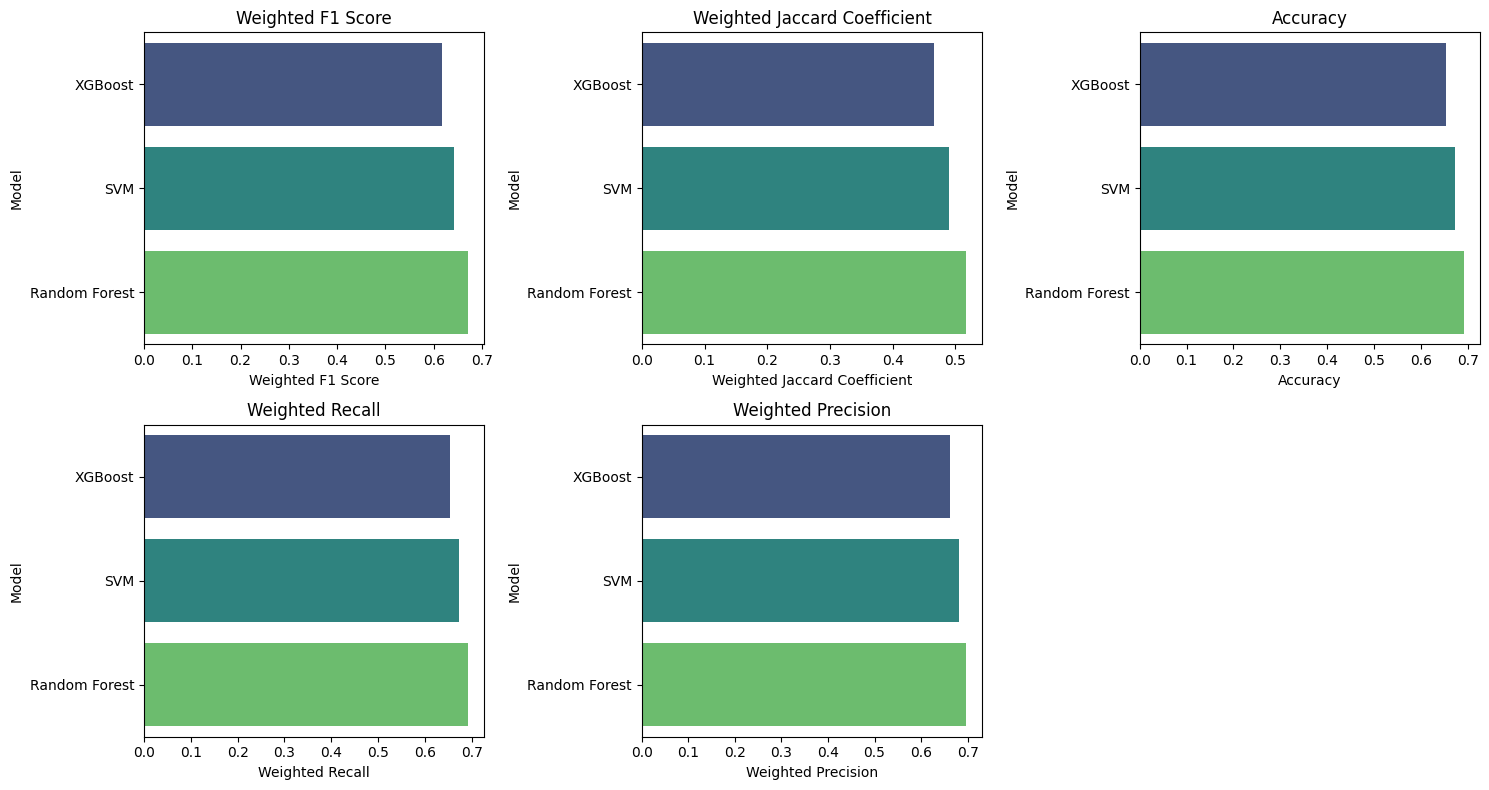

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Model': ['XGBoost', 'SVM', 'Random Forest'],
    'Weighted F1 Score': [0.6178, 0.6427, 0.6709],
    'Weighted Jaccard Coefficient': [0.4655, 0.4892, 0.5166],
    'Accuracy': [0.6540, 0.6726, 0.6919],
    'Weighted Recall': [0.6540, 0.6726, 0.6919],
    'Weighted Precision': [0.6631, 0.6808, 0.6963]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(15, 8))

# Weighted F1 Score
plt.subplot(2, 3, 1)
sns.barplot(x='Weighted F1 Score', y='Model', data=df, palette='viridis')
plt.title('Weighted F1 Score')

# Weighted Jaccard Coefficient
plt.subplot(2, 3, 2)
sns.barplot(x='Weighted Jaccard Coefficient', y='Model', data=df, palette='viridis')
plt.title('Weighted Jaccard Coefficient')

# Accuracy
plt.subplot(2, 3, 3)
sns.barplot(x='Accuracy', y='Model', data=df, palette='viridis')
plt.title('Accuracy')

# Weighted Recall
plt.subplot(2, 3, 4)
sns.barplot(x='Weighted Recall', y='Model', data=df, palette='viridis')
plt.title('Weighted Recall')

# Weighted Precision
plt.subplot(2, 3, 5)
sns.barplot(x='Weighted Precision', y='Model', data=df, palette='viridis')
plt.title('Weighted Precision')

plt.tight_layout()
plt.show()


Interpretation:
 Accuracy: Random Forest has the highest accuracy (0.6919), indicating that it correctly predicts the target values more often than XGBoost and SVM.
Weighted F1 Score: Random Forest also has the highest weighted F1 score (0.6709), which considers both precision and recall.
 Weighted Jaccard Coefficient: Random Forest has the highest weighted Jaccard coefficient (0.5166), which measures the similarity between predicted and true labels.
Weighted Recall: Random Forest has the highest weighted recall (0.6919), indicating that it captures a higher proportion of true positives.
 Weighted Precision: Random Forest has the highest weighted precision (0.6963), indicating that it has a higher proportion of true positives among predicted positives.
Random Forest appears to be the best-performing model


#  Classification with "title" Column

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_classifier.predict(X_test)



In [ ]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
jaccard = jaccard_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)

Weighted F1 Score: 0.6590804903229399
Weighted Jaccard Coefficient: 0.5067866036059903
Accuracy: 0.6886620488516223
Weighted Recall: 0.6886620488516223
Weighted Precision: 0.7044907076797511


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score


# Create an SVM Classifier with RBF kernel
svm_classifier = SVC(kernel='rbf')

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)


# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
jaccard = jaccard_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)

Weighted F1 Score: 0.6513402944834656
Weighted Jaccard Coefficient: 0.4984455823368668
Accuracy: 0.6810061975938754
Weighted Recall: 0.6810061975938754
Weighted Precision: 0.6927250931365133


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'title' and 'authors' are columns in your DataFrame 'df'
encoder = LabelEncoder()
df['title'] = encoder.fit_transform(df['title'])
df['authors'] = encoder.fit_transform(df['authors'])

# Displaying a sample of the DataFrame
print(df.sample(5))


       title  authors  average_rating language_code  # num_pages  \
10772   7965     6091            4.30         en-US          496   
9738   11498     5408            3.32           eng          384   
3198     763     7079            3.48           eng          192   
13302   5010      189            4.11         en-US          248   
13428   4105     6038            3.67           eng          401   

       ratings_count  text_reviews_count  
10772           7292                 335  
9738            3603                 190  
3198              92                  15  
13302            559                  81  
13428             31                   3  


In [ ]:
# Adding 'language_code'
df['language_code'] = encoder.fit_transform(df['language_code'])

In [ ]:
df

,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
0,3718,3024,4.56,7,652,1944099,26249
1,3719,3024,4.49,7,870,1996446,27613
2,3722,3024,4.47,7,320,5629932,70390
3,3716,3018,4.41,7,352,6267,272
4,3721,3024,4.55,7,435,2149872,33964
...,...,...,...,...,...,...,...
13709,5204,5254,3.82,7,260,11317,1060
13710,1202,5241,3.72,7,160,8710,361
13711,4280,5247,3.53,6,239,14334,1485
13712,9046,809,4.43,7,224,1550,38


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_attributes = df.drop("average_rating", axis=1)

# Standardizing the features using StandardScaler
df_scaled = StandardScaler().fit_transform(df_attributes)

# Separating features and target variable
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['average_rating'], test_size=0.3)


In [ ]:
import pandas as pd

# Assuming you have your true labels in a DataFrame called 'df_test'
df_test = pd.DataFrame({'true_average_rating': y_test})

# Define bins and labels for classification
bins = [-float('inf'), 2, 4, 5]
labels = ['BAD', 'Medium', 'Good']

# Create a new column 'true_class' based on the true average rating values
df_test['true_class'] = pd.cut(df_test['true_average_rating'], bins=bins, labels=labels, include_lowest=True)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

def evaluate_regression(y_true, y_pred):
    """
    Evaluate regression performance
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    explained_var = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    return {
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared': r2,
        'Explained Variance Score': explained_var,
        'Mean Absolute Error': mae
    }

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Support Vector Regression (SVR) model
svr_model = LinearSVR()

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Assuming y_test is the true target values
evaluation_results = evaluate_regression(y_test, y_pred)

evaluation_results


{'Mean Squared Error': 0.12960032846021313,
 'Root Mean Squared Error': 0.3600004561944514,
 'R-squared': 0.02432174027870615,
 'Explained Variance Score': 0.030456961406278293,
 'Mean Absolute Error': 0.23328260572356535}

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

def evaluate_classification(y_true, y_pred, df_test):
    # Make a copy of the DataFrame to avoid modifying the original
    df_test_copy = df_test.copy()

    # Define bins and labels for classification
    bins = [-float('inf'), 2, 4, float('inf')]
    labels = ['BAD', 'Medium', 'Good']

    # Assuming you have your predicted labels in a DataFrame called 'df_pred'
    df_test_copy['predicted_average_rating'] = y_pred

    # Create a new column 'predicted_class' based on the predicted average rating values
    df_test_copy['predicted_class'] = pd.cut(df_test_copy['predicted_average_rating'], bins=bins, labels=labels, include_lowest=True)

    # Use LabelEncoder to convert string labels to numerical labels
    label_encoder = LabelEncoder()
    df_test_copy['true_class'] = label_encoder.fit_transform(df_test_copy['true_class'])
    df_test_copy['predicted_class'] = label_encoder.transform(df_test_copy['predicted_class'])

    # Calculate evaluation metrics
    f1 = f1_score(df_test_copy['true_class'], df_test_copy['predicted_class'], average='weighted')
    jaccard = jaccard_score(df_test_copy['true_class'], df_test_copy['predicted_class'], average='weighted')
    accuracy = accuracy_score(df_test_copy['true_class'], df_test_copy['predicted_class'])
    recall = recall_score(df_test_copy['true_class'], df_test_copy['predicted_class'], average='weighted')
    precision = precision_score(df_test_copy['true_class'], df_test_copy['predicted_class'], average='weighted')

    return {'F1 Score': f1, 'Jaccard Score': jaccard, 'Accuracy Score': accuracy, 'Recall Score': recall, 'Precision Score': precision}


In [ ]:
scores = evaluate_classification(df_test['true_class'], y_pred, df_test)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'F1 Score': 0.5562077081018206,
 'Jaccard Score': 0.4140806576769318,
 'Accuracy Score': 0.6155528554070474,
 'Recall Score': 0.6155528554070474,
 'Precision Score': 0.6122939939340358}

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


# Create a KNN Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)



In [ ]:
# Assuming y_test is the true target values
evaluation_results = evaluate_regression(y_test, y_pred)

evaluation_results


{'Mean Squared Error': 0.14615813462940463,
 'Root Mean Squared Error': 0.38230633610941456,
 'R-squared': -0.08021844954860691,
 'Explained Variance Score': -0.07950232652518752,
 'Mean Absolute Error': 0.25099927095990276}

In [ ]:
scores = evaluate_classification(df_test['true_class'], y_pred, df_test)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'F1 Score': 0.5792450605181839,
 'Jaccard Score': 0.41739768983973463,
 'Accuracy Score': 0.591494532199271,
 'Recall Score': 0.591494532199271,
 'Precision Score': 0.5780023356525619}


GradientBoostingRegressor with GridSearchCV


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Create a Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
params = {
    "n_estimators": [20, 50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "max_depth": [3, 5, 10],
    "min_samples_leaf": [3, 5],
    "max_features": [0.3, 1]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=params, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Use the best model to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 0.3, 'min_samples_leaf': 3, 'n_estimators': 100}


In [ ]:
# Assuming y_test is the true target values
evaluation_results = evaluate_regression(y_test, y_pred)

evaluation_results


{'Mean Squared Error': 0.10469589585946645,
 'Root Mean Squared Error': 0.3235674517924608,
 'R-squared': 0.22621865292564758,
 'Explained Variance Score': 0.22689733328782635,
 'Mean Absolute Error': 0.2232526194884356}

In [ ]:
from sklearn.svm import SVR
# Create a Gaussian SVR model
gaussian_svr = SVR(kernel='rbf')

# Define the parameter grid for GridSearchCV
params = {
    "C": [1, 5, 50, 100],
    "gamma": [0.001, 0.01, 0.1],
    "epsilon": [0.01, 0.1]
}

# Create the GridSearchCV object
grid_search_svr = GridSearchCV(estimator=gaussian_svr, param_grid=params, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data with grid search
grid_search_svr.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_svr = grid_search_svr.best_params_
print('Best Parameters:', best_params_svr)

# Use the best model to make predictions on the test set
y_pred = grid_search_svr.best_estimator_.predict(X_test)

Best Parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 0.1}


In [ ]:
# Assuming y_test is the true target values
evaluation_results = evaluate_regression(y_test, y_pred)

evaluation_results


{'Mean Squared Error': 0.12688690826440444,
 'Root Mean Squared Error': 0.3562118867533823,
 'R-squared': 0.04474935127316437,
 'Explained Variance Score': 0.05042158979723432,
 'Mean Absolute Error': 0.22737099657062107}

In [ ]:
scores = evaluate_classification(df_test['true_class'], y_pred, df_test)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'F1 Score': 0.5931158216153806,
 'Jaccard Score': 0.4407082871203458,
 'Accuracy Score': 0.6289185905224788,
 'Recall Score': 0.6289185905224788,
 'Precision Score': 0.6213705747974164}

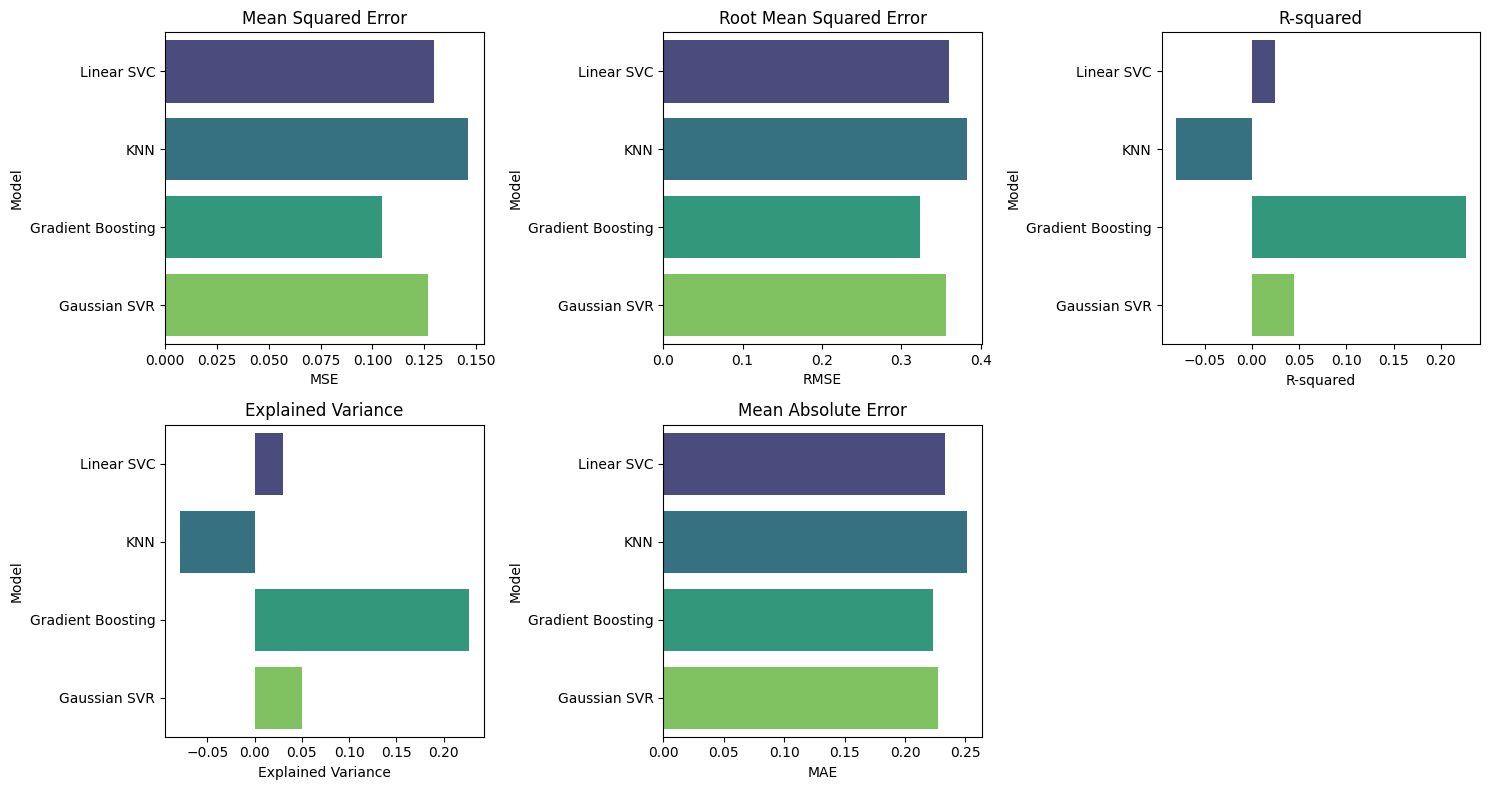

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Model': ['Linear SVC', 'KNN', 'Gradient Boosting', 'Gaussian SVR'],
    'MSE': [0.1296, 0.1462, 0.1047, 0.1269],
    'RMSE': [0.36, 0.3823, 0.3236, 0.3562],
    'R-squared': [0.0243, -0.0802, 0.2262, 0.0447],
    'Explained Variance': [0.0305, -0.0795, 0.2269, 0.0504],
    'MAE': [0.2333, 0.2510, 0.2233, 0.2274]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(15, 8))

# Mean Squared Error
plt.subplot(2, 3, 1)
sns.barplot(x='MSE', y='Model', data=df, palette='viridis')
plt.title('Mean Squared Error')

# Root Mean Squared Error
plt.subplot(2, 3, 2)
sns.barplot(x='RMSE', y='Model', data=df, palette='viridis')
plt.title('Root Mean Squared Error')

# R-squared
plt.subplot(2, 3, 3)
sns.barplot(x='R-squared', y='Model', data=df, palette='viridis')
plt.title('R-squared')

# Explained Variance
plt.subplot(2, 3, 4)
sns.barplot(x='Explained Variance', y='Model', data=df, palette='viridis')
plt.title('Explained Variance')

# Mean Absolute Error
plt.subplot(2, 3, 5)
sns.barplot(x='MAE', y='Model', data=df, palette='viridis')
plt.title('Mean Absolute Error')

plt.tight_layout()
plt.show()


The lower the Mean Absolute Error (MAE), the better the model performance.

The model with the lowest MAE is Gradient Boosting with an MAE of 0.2232.
R-squared and Explained Variance are also important metrics. Gradient Boosting shows the highest values for these metrics, indicating a better fit to the data.
Therefore, based on the provided metrics, Gradient Boosting seems to be the best-performing mode

# ANN


In [ ]:
columns_to_drop = ['isbn', 'isbn13', 'bookID','title','authors']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'title' and 'authors' are columns in your DataFrame 'df'
encoder = LabelEncoder()
# Adding 'language_code'
df['language_code'] = encoder.fit_transform(df['language_code'])

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_attributes = df.drop("average_rating", axis=1)

# Standardizing the features using StandardScaler
df_scaled = StandardScaler().fit_transform(df_attributes)

# Separating features and target variable
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['average_rating'], test_size=0.3)


In [ ]:
pip install livelossplot


ANN  structure:
- Input Layer: 4 nodes (features) with ReLU activation function.
- Hidden Layer 1: 8 nodes with ReLU activation function.
- Hidden Layer 2: 16 nodes with ReLU activation function, followed by a Dropout layer with a dropout rate of 0.5 and Batch Normalization.
- Output Layer: 1 node with linear activation function for regression.
The model is compiled using the Adam optimizer with a learning rate of 0.001, mean squared error as the loss function, and mean absolute error as the evaluation metric. This architecture is suitable for regression tasks.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Define the architecture of the neural network
my_custom_model = Sequential()

# Input layer with 4 nodes
my_custom_model.add(Dense(units=4, input_dim=4, activation='relu'))

# Hidden layer 1 with 8 nodes
my_custom_model.add(Dense(units=8, activation='relu'))

# Hidden layer 1 with 16 nodes, dropout, and batch normalization
my_custom_model.add(Dense(units=16, activation='relu'))
my_custom_model.add(Dropout(0.5))
my_custom_model.add(BatchNormalization())

# Output layer with 1 node (linear activation for regression)
my_custom_model.add(Dense(units=1, activation='linear'))
# Compile the model
my_custom_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        loss='mean_squared_error',
                        metrics=['mean_absolute_error'])

# Display the model summary
my_custom_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                        

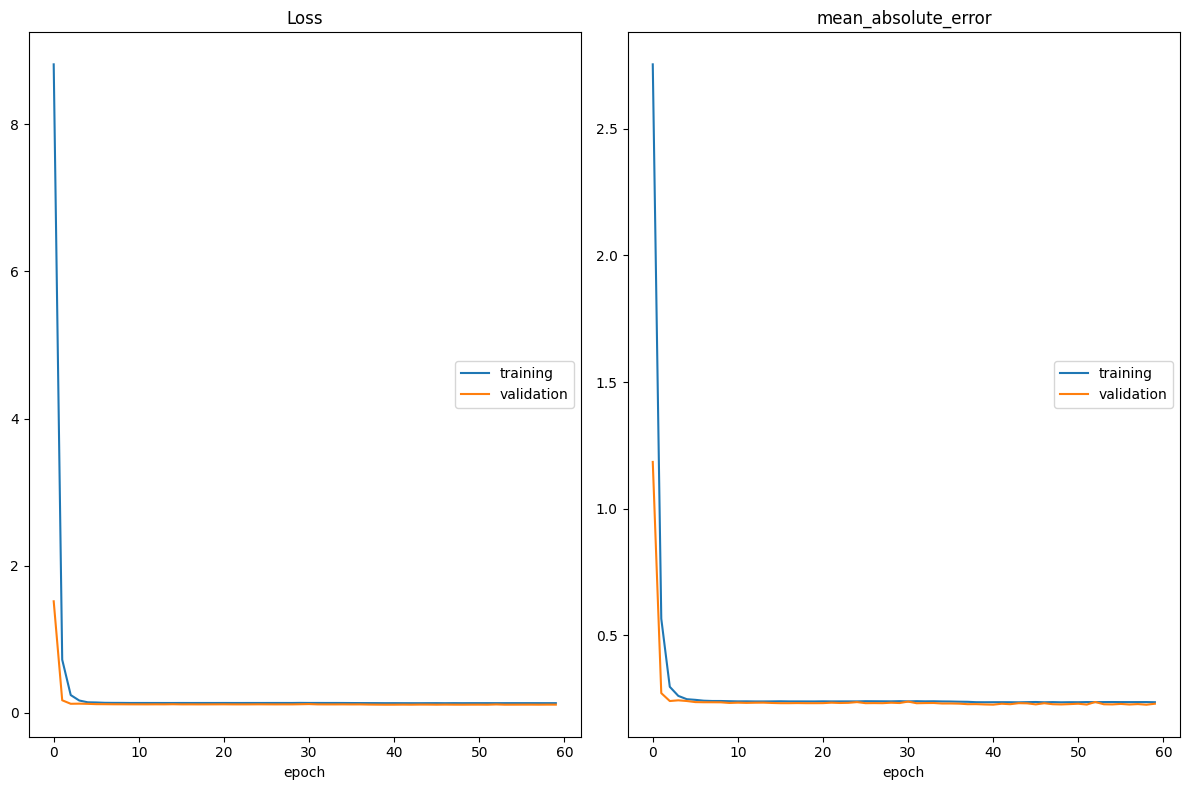

Loss
	training         	 (min:    0.131, max:    8.815, cur:    0.132)
	validation       	 (min:    0.111, max:    1.516, cur:    0.111)
mean_absolute_error
	training         	 (min:    0.235, max:    2.755, cur:    0.235)
	validation       	 (min:    0.225, max:    1.184, cur:    0.229)

Epoch 60: val_mean_absolute_error did not improve from 0.22536
129/129 [==============================] - 1s 4ms/step - loss: 0.1114 - mean_absolute_error: 0.2292
Test Loss: 0.111426442861557, Test Metric: 0.22920674085617065


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot import PlotLossesKeras

# Define the ModelCheckpoint callback
best_weights_filepath = 'best_weights.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=best_weights_filepath,
    monitor='val_mean_absolute_error',  # Monitor the validation mean absolute error
    save_best_only=True,
    mode='min',
    verbose=1
)

# Fit the model using the training data
history = my_custom_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[PlotLossesKeras(), EarlyStopping(patience=20), checkpoint_callback]
)

# Evaluate the model on the test set
test_loss, test_metric = my_custom_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Metric: {test_metric}")


The model has an average absolute error of 0.2292 on the test set. This means that, on average, the model's predictions deviate by approximately 0.2292 units from the actual values. The overall performance of the model on the test set, as indicated by the test loss, is relatively good with a value of 0.1114

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.6 MB/s eta 0:00:00


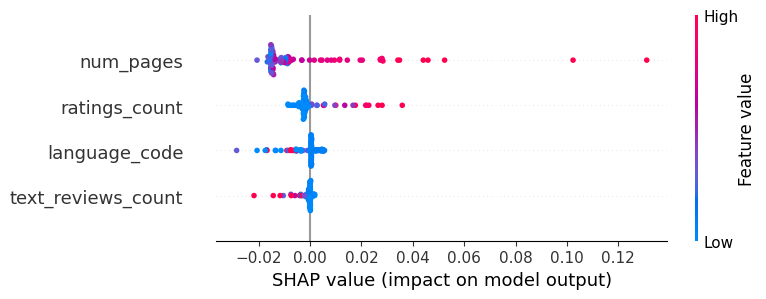

In [ ]:
import shap
# Create a background dataset for the explainer
background_data = shap.maskers.Independent(X_train, max_samples=100)

# Create a SHAP explainer using the background dataset
explainer = shap.Explainer(my_custom_model, masker=background_data)

# Calculate SHAP values for a sample of the data
shap_values = explainer(X_train[:100])

# Summarize the feature importance across all samples
shap.summary_plot(shap_values, feature_names=["language_code", "num_pages", "ratings_count", "text_reviews_count"])



In [ ]:
from tensorflow.keras.models import load_model

# Load the best model using the saved weights
best_model = load_model("/content/best_weights.h5")

# Now you can use this best_model for further predictions
y_pred = best_model.predict(X_test)



129/129 [==============================] - 0s 2ms/step


In [ ]:
y_pred_train= best_model.predict(X_train)

300/300 [==============================] - 2s 6ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

def evaluate_regression(y_true, y_pred):
    """
    Evaluate regression performance
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    explained_var = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    return {
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared': r2,
        'Explained Variance Score': explained_var,
        'Mean Absolute Error': mae
    }

In [ ]:
# Assuming y_test is the true target values
evaluation_results = evaluate_regression(y_test, y_pred)

evaluation_results


{'Mean Squared Error': 0.12836682870446844,
 'Root Mean Squared Error': 0.3582831683242578,
 'R-squared': 0.04417064940503801,
 'Explained Variance Score': 0.05143654861512437,
 'Mean Absolute Error': 0.22769635591472193}

In [ ]:
import pandas as pd

# Assuming you have your true labels in a DataFrame called 'df_test'
df_test = pd.DataFrame({'true_average_rating': y_test})

# Define bins and labels for classification
bins = [-float('inf'), 2, 4, 5]
labels = ['BAD', 'Medium', 'Good']

# Create a new column 'true_class' based on the true average rating values
df_test['true_class'] = pd.cut(df_test['true_average_rating'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

def evaluate_classification(y_true, y_pred, df_test):
    # Make a copy of the DataFrame to avoid modifying the original
    df_test_copy = df_test.copy()

    # Define bins and labels for classification
    bins = [-float('inf'), 2, 4, float('inf')]
    labels = ['BAD', 'Medium', 'Good']

    # Assuming you have your predicted labels in a DataFrame called 'df_pred'
    df_test_copy['predicted_average_rating'] = y_pred

    # Create a new column 'predicted_class' based on the predicted average rating values
    df_test_copy['predicted_class'] = pd.cut(df_test_copy['predicted_average_rating'], bins=bins, labels=labels, include_lowest=True)

    # Use LabelEncoder to convert string labels to numerical labels
    label_encoder = LabelEncoder()
    df_test_copy['true_class'] = label_encoder.fit_transform(df_test_copy['true_class'])
    df_test_copy['predicted_class'] = label_encoder.transform(df_test_copy['predicted_class'])

    # Calculate evaluation metrics
    f1 = f1_score(df_test_copy['true_class'], df_test_copy['predicted_class'], average='weighted')
    jaccard = jaccard_score(df_test_copy['true_class'], df_test_copy['predicted_class'], average='weighted')
    accuracy = accuracy_score(df_test_copy['true_class'], df_test_copy['predicted_class'])
    recall = recall_score(df_test_copy['true_class'], df_test_copy['predicted_class'], average='weighted')
    precision = precision_score(df_test_copy['true_class'], df_test_copy['predicted_class'], average='weighted')

    return {'F1 Score': f1, 'Jaccard Score': jaccard, 'Accuracy Score': accuracy, 'Recall Score': recall, 'Precision Score': precision}


In [ ]:
scores = evaluate_classification(df_test['true_class'], y_pred, df_test)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'F1 Score': 0.5721752797568282,
 'Jaccard Score': 0.419835422439523,
 'Accuracy Score': 0.612636695018226,
 'Recall Score': 0.612636695018226,
 'Precision Score': 0.6108685504463576}

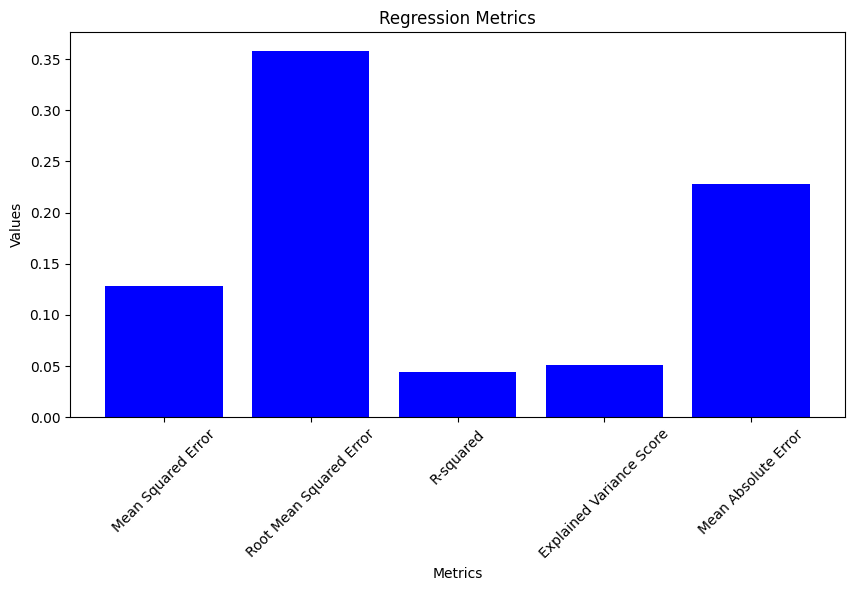

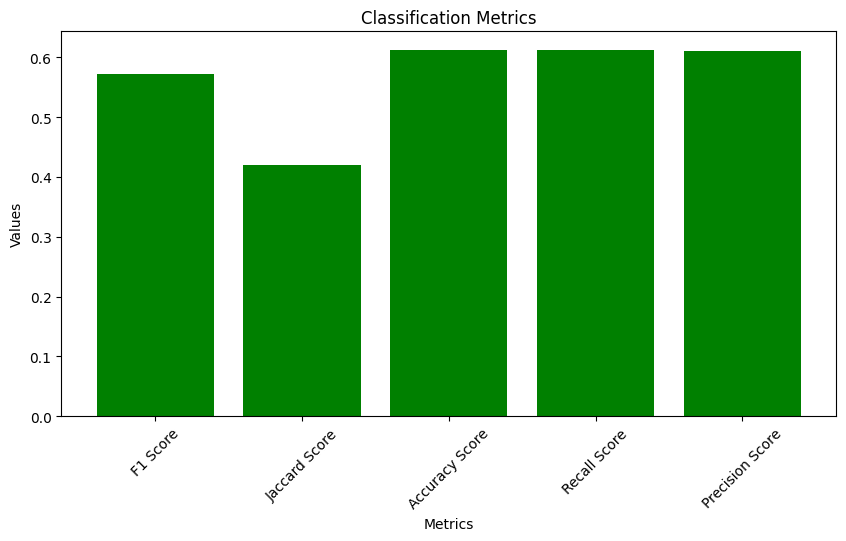

In [1]:
import matplotlib.pyplot as plt

# Regression Metrics
regression_metrics = {
    'Mean Squared Error': 0.12836682870446844,
    'Root Mean Squared Error': 0.3582831683242578,
    'R-squared': 0.04417064940503801,
    'Explained Variance Score': 0.05143654861512437,
    'Mean Absolute Error': 0.22769635591472193
}

# Classification Metrics
classification_metrics = {

}

# Plotting Regression Metrics
plt.figure(figsize=(10, 5))
plt.bar(regression_metrics.keys(), regression_metrics.values(), color='blue')
plt.title('Regression Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Plotting Classification Metrics
plt.figure(figsize=(10, 5))
plt.bar(classification_metrics.keys(), classification_metrics.values(), color='green')
plt.title('Classification Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


# Hybrid

In [ ]:
new_df = df.copy()
new_df['ANN_predictions'] = np.concatenate([y_pred_train, y_pred])

In [ ]:
new_df

,average_rating,language_code,# num_pages,ratings_count,text_reviews_count,ANN_predictions
0,4.56,7,652,1944099,26249,3.943498
1,4.49,7,870,1996446,27613,3.943498
2,4.47,7,320,5629932,70390,4.048030
3,4.41,7,352,6267,272,3.943498
4,4.55,7,435,2149872,33964,3.943498
...,...,...,...,...,...,...
13709,3.82,7,260,11317,1060,3.943498
13710,3.72,7,160,8710,361,3.953785
13711,3.53,6,239,14334,1485,3.943498
13712,4.43,7,224,1550,38,3.943498


In [ ]:
import pandas as pd

bins = [-float('inf'), 2, 4, 5]
labels = ['BAD', 'Medium', 'Good']

new_df['class'] = pd.cut(new_df['average_rating'], bins=bins, labels=labels, include_lowest=True)


In [ ]:
new_df = new_df.drop("average_rating", axis=1)

from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
new_df['class'] = encoder.fit_transform(new_df['class'])

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df_attributes = new_df.drop("class", axis=1)

# Standardizing the features using StandardScaler
df_scaled = StandardScaler().fit_transform(df_attributes)

# Separating features and target variable
X_train, X_test, y_train, y_test = train_test_split(df_scaled, new_df['class'], test_size=0.3)
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score


# Create an SVM Classifier with RBF kernel
svm_classifier = SVC(kernel='rbf')

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)


# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
jaccard = jaccard_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)

Weighted F1 Score: 0.5508955077117833
Weighted Jaccard Coefficient: 0.4104514302958339
Accuracy: 0.616767922235723
Weighted Recall: 0.616767922235723
Weighted Precision: 0.6291023591384703


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


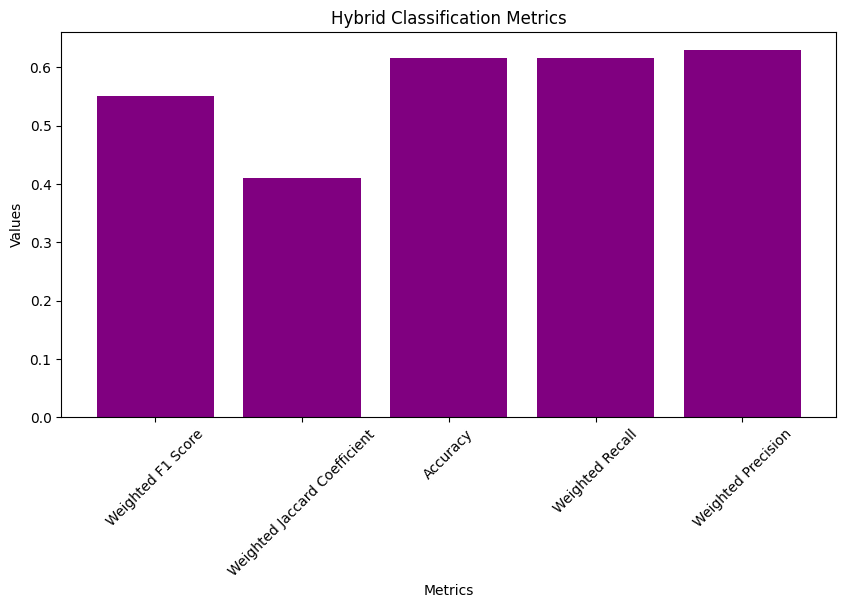

In [3]:
import matplotlib.pyplot as plt

# Classification Metrics
classification_metrics = {
    'Weighted F1 Score': 0.5508955077117833,
    'Weighted Jaccard Coefficient': 0.4104514302958339,
    'Accuracy': 0.616767922235723,
    'Weighted Recall': 0.616767922235723,
    'Weighted Precision': 0.6291023591384703
}

# Plotting Classification Metrics
plt.figure(figsize=(10, 5))
plt.bar(classification_metrics.keys(), classification_metrics.values(), color='purple')
plt.title('Hybrid Classification Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()
